In [22]:
import sys
sys.path.insert(0, '_libs/')

In [23]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from NEMO_tools import reporj_NEMOgrid
% matplotlib inline

In [3]:
ANHA4_name=glob.glob('_data/NEMO/ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc')
ANH4_obj=nc.Dataset(ANHA4_name[0])
# Variables
nav_lon=ANH4_obj.variables['nav_lon'][:]
nav_lat=ANH4_obj.variables['nav_lat'][:]
runoff=ANH4_obj.variables['runoff'][:]*1e4

In [24]:
xgrid, ygrid = np.meshgrid(np.linspace(-180, 180, 720), np.linspace(60, 90, 60))

In [29]:
runoff_int = reporj_NEMOgrid(nav_lon, nav_lat, runoff[7, :, :], xgrid, ygrid, method='linear')

In [4]:
name = ['Pechora', 'Ob', 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', 'Sev. Dvina', 'Lena', 'khatanga', 'Taimyra', 'Pyasina']
lons = [52+3     , 66+4, 88-5     , 120     , 137   , 151.5      , 162     , -135       , 42-2        , 127   , 103+4     , 100      , 87     ]
lats = [67+1.5   , 66.5, 70+1     , 73      , 71.5  , 71.5       , 69.5    , 69         , 65          , 73.5  , 72+1.5    , 76       , 74     ]
name2 = ['Coppermine', 'Ellice', 'Back', 'Hayes', 'Kuujuua', 'Thomsen', 'Cunningham', 'Clyde']
lons2 = [-115        , -103.5 , -95.3, -92      , np.nan   , -120     , -94         , -68.5]
lats2 = [68          , 68     ,  67.2, 57       , np.nan   , 74       , 74          , 70.5]

In [5]:
#lons = [52, 66, 88, 123, 136, 148, 159, 135, 42, 127, 103, 100, 88]
#lats = [67, 67, 70, 72, 71, 70, 69, 68, 65, 73, 72, 76, 72]

In [6]:
ETOPO2_Arctic=scipy.io.loadmat('_libs/ETOPO2_Arctic.mat')
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']
#
res_unit=5
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1

F:\Anaconda\lib\site-packages\matplotlib\colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


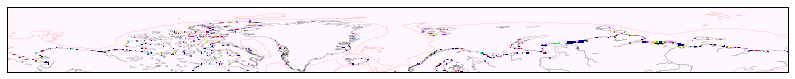

In [30]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()
proj = Basemap(projection='cyl', llcrnrlat=60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='l', suppress_ticks=True)
#plt.axis('off')
#plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
#plt.tick_params(axis='y', which='both', bottom='off', top='off', labelbottom='off')
#plt.setp(ax.get_xticklabels(), visible=False)
#proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawcoastlines(linestyle='-', color='k', linewidth=0.1, zorder=3)
xs, ys = proj(lons, lats); 
xs2, ys2 = proj(lons2, lats2)
x, y = proj(xgrid, ygrid)
topox, topoy = proj(lon_arctic, lat_arctic)

proj.plot(xs, ys, 'ko',ms=1); proj.plot(xs2, ys2, 'ko', ms=1)
CS2 = proj.contour(topox, topoy, topo_arctic, [1000], linestyles='-', linewidths=0.1, colors=('r',))
CS=proj.pcolor(x, y, runoff_int, vmin=0, vmax=1, cmap=plt.cm.gist_ncar_r)
plt.savefig('Arctic_river.png', dpi=600, facecolor='w', edgecolor='w',
            orientation='portrait', papertype='a4', format='png',
            transparent=True, bbox_inches='tight', pad_inches=0,
            frameon=None)